8 vLLM Llama instances running on a MI325x8 single node, each using 1 GPU, without NUMA alignment.

20 samples collected for each configuration.
- Number of prompts varies from 2 to 40, in increments of 2 (i.e., 2, 4, 6, …, 40).
- Both input and output sequence lengths are fixed at 1024 tokens.

In [11]:
import json
import pandas as pd
import ast
import matplotlib.pyplot as plt
from itertools import product
import numpy
%matplotlib inline  

In [2]:
# Collected Data
df = pd.read_csv("./Llama-3.1-70B-Instruct_vllm_20260225_2.csv")

In [3]:
df['base_url'].unique()

array(['http://llama-vllm0.default.svc.cluster.local:80',
       'http://llama-vllm1.default.svc.cluster.local:80',
       'http://llama-vllm2.default.svc.cluster.local:80',
       'http://llama-vllm3.default.svc.cluster.local:80',
       'http://llama-vllm4.default.svc.cluster.local:80',
       'http://llama-vllm5.default.svc.cluster.local:80',
       'http://llama-vllm6.default.svc.cluster.local:80',
       'http://llama-vllm7.default.svc.cluster.local:80'], dtype=object)

In [4]:
df['others'].unique()

array(['doks-1.34.1-rocm-7.0.2-vllm-gpu-01234567-mi325'], dtype=object)

In [5]:
# All requests are successfully processed
df [ df['failed'] >0 ] 

,request_goodput,total_token_throughput,median_ttft_ms,request_throughput,others,date,mean_ttft_ms,p99_tpot_ms,num_prompts,backend,...,std_ttft_ms,tokenizer_id,median_itl_ms,p99_ttft_ms,total_output_tokens,endpoint_type,burstiness,total_input_tokens,median_tpot_ms,mean_tpot_ms


In [6]:

gpu_map = {
    "http://llama-vllm0.default.svc.cluster.local:80": "gpu 0",
    "http://llama-vllm1.default.svc.cluster.local:80": "gpu 1",
    "http://llama-vllm2.default.svc.cluster.local:80": "gpu 2",
    "http://llama-vllm3.default.svc.cluster.local:80": "gpu 3",
    "http://llama-vllm4.default.svc.cluster.local:80": "gpu 4",
    "http://llama-vllm5.default.svc.cluster.local:80": "gpu 5",
    "http://llama-vllm6.default.svc.cluster.local:80": "gpu 6",
    "http://llama-vllm7.default.svc.cluster.local:80": "gpu 7",
}
df["gpu_name"] = df["base_url"].map(gpu_map)

df = df.sort_values(["gpu_name", "num_prompts"])

In [7]:
gpu_names = [ "gpu 0", "gpu 1", "gpu 2", "gpu 3", "gpu 4", "gpu 5", "gpu 6", "gpu 7" ]

GPU: gpu 0
GPU: gpu 1
GPU: gpu 2
GPU: gpu 3
GPU: gpu 4
GPU: gpu 5
GPU: gpu 6
GPU: gpu 7


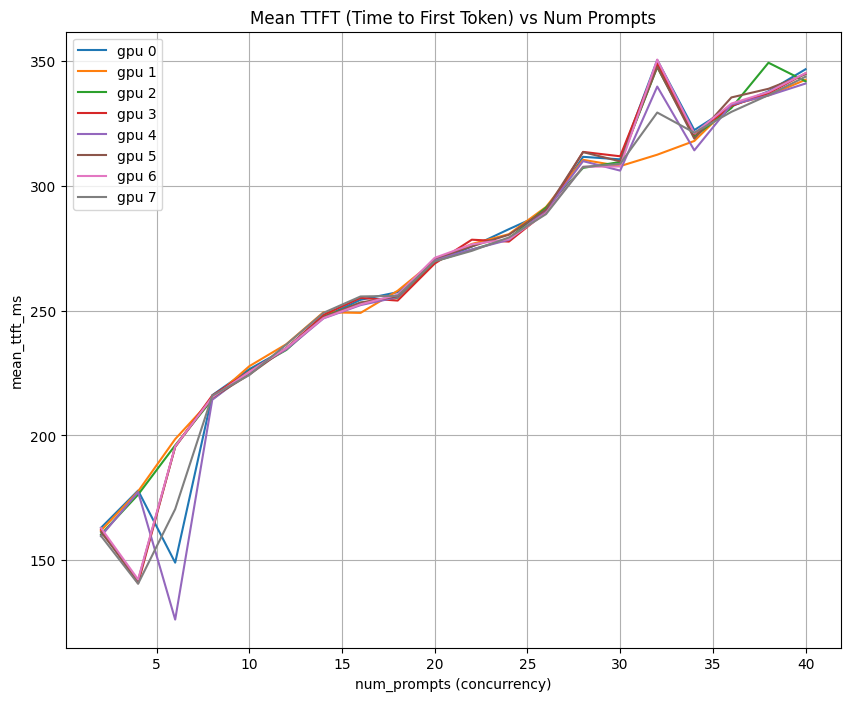

In [8]:
plt.figure(figsize=(10, 8))

for n in gpu_names:
    print(f"GPU: {n}")
    
    temp_df = df[ df['gpu_name'] == n ]

    if temp_df.empty:
        continue  # skip if no data

    plt.plot(
        temp_df["num_prompts"],
        temp_df["mean_ttft_ms"],

        label=f"{n}"
    )

# Move these OUTSIDE the loop
plt.xlabel("num_prompts (concurrency)")
plt.ylabel("mean_ttft_ms")
plt.title("Mean TTFT (Time to First Token) vs Num Prompts")
plt.legend()
plt.grid(True)

plt.show()

GPU: gpu 0
GPU: gpu 1
GPU: gpu 2
GPU: gpu 3
GPU: gpu 4
GPU: gpu 5
GPU: gpu 6
GPU: gpu 7


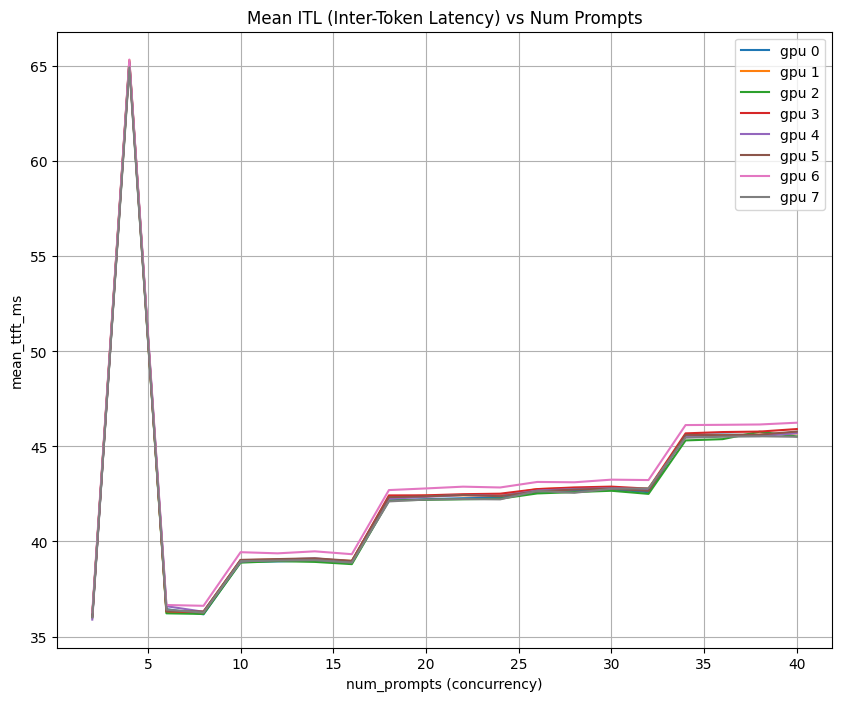

In [9]:
plt.figure(figsize=(10, 8))

for n in gpu_names:
    print(f"GPU: {n}")
    
    temp_df = df[ df['gpu_name'] == n ]

    if temp_df.empty:
        continue  # skip if no data

    plt.plot(
        temp_df["num_prompts"],
        temp_df["mean_itl_ms"],

        label=f"{n}"
    )

# Move these OUTSIDE the loop
plt.xlabel("num_prompts (concurrency)")
plt.ylabel("mean_ttft_ms")
plt.title("Mean ITL (Inter-Token Latency) vs Num Prompts")
plt.legend()
plt.grid(True)

plt.show()

GPU: gpu 0
GPU: gpu 1
GPU: gpu 2
GPU: gpu 3
GPU: gpu 4
GPU: gpu 5
GPU: gpu 6
GPU: gpu 7


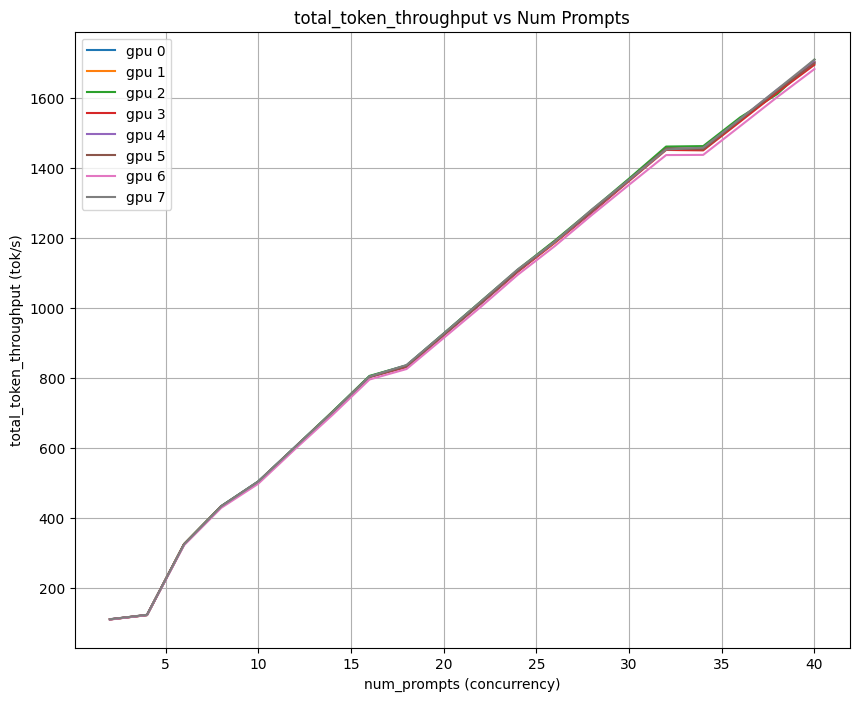

In [10]:
plt.figure(figsize=(10, 8))

for n in gpu_names:
    print(f"GPU: {n}")
    
    temp_df = df[ df['gpu_name'] == n ]

    if temp_df.empty:
        continue  # skip if no data

    plt.plot(
        temp_df["num_prompts"],
        temp_df["total_token_throughput"],
        label=f"{n}"
    )

# Move these OUTSIDE the loop
plt.xlabel("num_prompts (concurrency)")
plt.ylabel("total_token_throughput (tok/s)")
plt.title("total_token_throughput vs Num Prompts")
plt.legend()
plt.grid(True)

plt.show()